# Experimento de classificação

Nos experimentos a seguir lidaremos com um problema de classificação "binário", envolvendo apenas $\omega_1$ e $\omega_2$.

Serão utilizados os classificadores:

* Máxima Verossimilhança - ML: $(\mathbf{x} , \omega_j)  \Leftrightarrow \underset{\omega_j \in \Omega}{\arg \max} \ p(\mathbf{x}|\omega_j)$

* Mínima Distância Euclidiana - MDE: $(\mathbf{x} , \omega_j)  \Leftrightarrow \underset{\omega_j \in \Omega}{\arg \min} \ { \| \mathbf{x} - \mathbf{\mu}_i \|}$

* K-Vizinhos Mais Próximos - KNN: $(\mathbf{x} , \omega_j)  \Leftrightarrow \underset{\omega_j \in \Omega}{\arg \min} \  \{m_j \rho_{kj}(\mathbf{x})\} $

Os dados de "treinamento" ($\mathcal{D}$) e "classificação" ($\mathcal{I}$) são obtidos via simulação -- disponibilizados em "saidaSim_D.txt" e "saidaSim_I.txt", respectivamente.

A avaliação será realizada com base no percentual de concordância entre o rótulo dos dados de $\mathcal{I}$ e a classe estimada por cada um dos métodos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
from sklearn import mixture
import csv

In [2]:
np.random.seed(123456)
N = 200
path_out = 'Data/saidaSim.txt'
path_out_D = 'Data/saidaSim_D.txt'
path_out_I = 'Data/saidaSim_I.txt'

In [3]:
mu1 = [1.0, 1.0]
sigma1 = [[0.75, 0.5], [0.5, 2.0]]
rotulo1 = 1
qnt1 = 50
mu2 = [-2.0, 2.0]
sigma2 = [[0.5, -0.5], [-0.5, 1]]
rotulo2 = 2
qnt2 = 40

conjMu = np.array([mu1, mu2])
conjSigma = np.array([sigma1, sigma2])
rotulos = np.array([rotulo1, rotulo2])
quantidades = np.array([qnt1, qnt2])

f = open(path_out,"w")
for r in range(rotulos.size):
    dados = np.random.multivariate_normal(conjMu[r,:], conjSigma[r,:,:], quantidades[r]).T
    for i in range(0,quantidades[r]):
        st = str(rotulos[r])
        for j in range(0,dados.shape[0]):
            st += ','+ str(dados[j,i])
        st += '\n'
        f.write(st)
f.close()

In [4]:
(dados.shape)

(2, 40)

In [5]:
#Conjunto D
mu1 = [1,1]
sigma1 = [[0.75 , 0.5], [0.5 , 2.0]] 
rotulo1 = 1
qnt1 = 50
mu2 = [-2, -2]
sigma2 = [[0.5 , -0.5], [-0.5 , 1]]
rotulo2 = 2
qnt2 = 40

rotulos = np.array([rotulo1, rotulo2])
quantidades = np.array([qnt1,qnt2])
conjMu = np.array([mu1,mu2])
conjSigma = np.array([sigma1,sigma2])

f= open(path_out_D,"w")
for r in range(rotulos.size):
    dados = np.random.multivariate_normal(conjMu[r,:], conjSigma[r,:,:], quantidades[r]).T
    for i in range(0,quantidades[r]):
        st = str(rotulos[r])
        for j in range(0,dados.shape[0]):
            st += ','+ str(dados[j,i])
        st += '\n'
        f.write(st)

f.close()

In [6]:
(dados.shape)

(2, 40)

In [7]:
#Conjunto I
mu1 = [0.9, 0.9]
sigma1 =[[1.5 , 0.75], [0.75 , 1.5]]
rotulo1 = 1
qnt1 = 500
mu2 = [-1.75, -1.75]
sigma2 = [[1.5 , -0.5], [-0.5 , 1.5]]
rotulo2 = 2
qnt2 = 500

rotulos = np.array([rotulo1, rotulo2])
quantidades = np.array([qnt1, qnt2])
conjMu = np.array([mu1, mu2])
conjSigma = np.array([sigma1, sigma2])

f= open(path_out_I,"w")
for r in range(rotulos.size):
    dados = np.random.multivariate_normal(conjMu[r,:], conjSigma[r,:,:], quantidades[r]).T
    for i in range(0,quantidades[r]):
        st = str(rotulos[r])
        for j in range(0,dados.shape[0]):
            st += ','+ str(dados[j,i])
        st += '\n'
        f.write(st)

f.close()

In [8]:
(dados.shape)

(2, 500)

### Função para ler os arquivos

In [9]:
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack((data , np.asarray(row).astype(float))) # type: ignore
            except:
                data = np.asarray(row).astype(float)
    f.close()
    y = data[:,0] # type: ignore
    x = data[:,1:] # type: ignore
    return y,x

### Uso Modelo de Mistura de Gaussianas e Expectation-Maximization

In [10]:
path_data_I = 'Data/saidaSim_I.txt'
y,x = read_class_data(path_data_I)
k = 2
epsilon = 0.001 #Convergência
#m = x.shape[0]   #Número de observações
#dim = x.shape[1] #Dimensão do espaço de atributos

### GMM+EM

In [11]:
gmm = mixture.GaussianMixture(n_components=k, tol=epsilon, covariance_type='full', n_init=10, max_iter=100, init_params='kmeans', random_state=0)
gmm.fit(x)

GaussianMixture(n_components=2, n_init=10, random_state=0)

### Adicional - apenas para visulaizar as regiões de decisão e a noção de acerto/erro

In [12]:
xmin = np.min(x[:,0])
xmax = np.max(x[:,0])
ymin = np.min(x[:,1])
ymax = np.max(x[:,1])
X1, X2 = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))
Z = np.zeros((N,N))

for i in range(0,N):
    for j in range(0,N):
        padrao = [ [X1[i,j], X2[i,j]] ]
        Z[i,j] = np.exp( gmm.score( padrao ) )

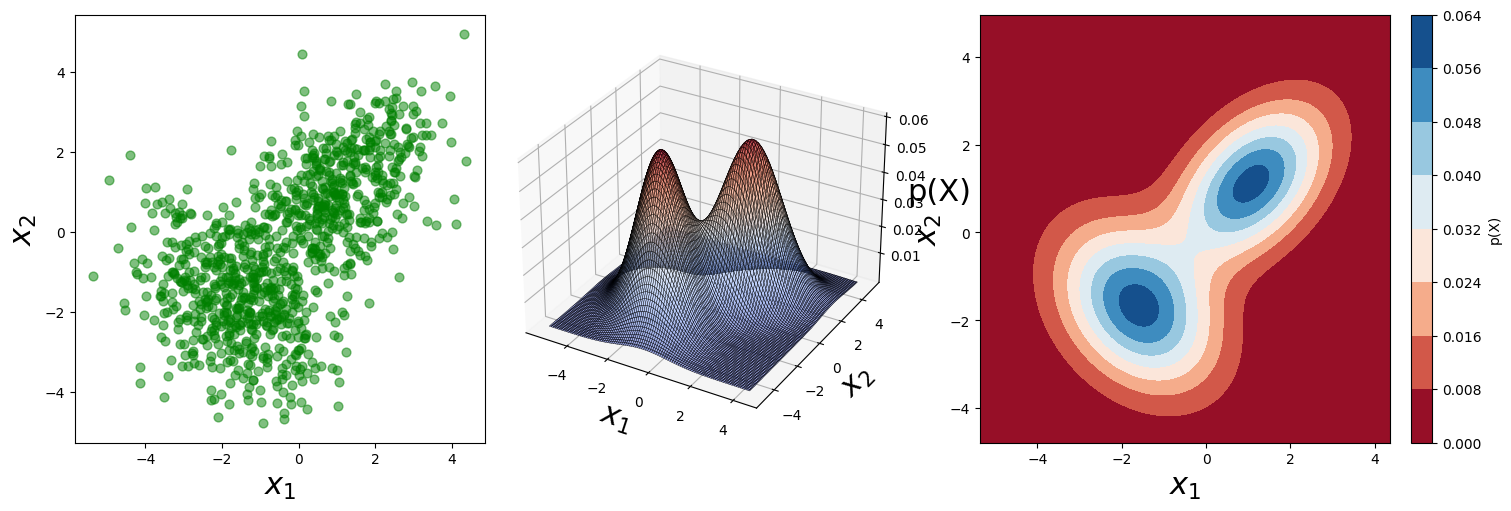

In [13]:
FS = (15,5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# Subplot 1 ------------------------
ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(x[:,0],x[:,1], marker='o', color='green', s=40, alpha=0.5) # type: ignore
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)

# Subplot 2 ------------------------
ax2 = fig.add_subplot(spec[0, 1],projection='3d')
ax2.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.25, antialiased=True, cmap=cm.coolwarm, edgecolors='k', alpha=0.5) # type: ignore
ax2.set_xlabel('$x_1$', fontsize=22)
ax2.set_ylabel('$x_2$', fontsize=22)
ax2.set_zlabel('p(X)', fontsize=22)

# Subplot 3 ------------------------
ax3 = fig.add_subplot(spec[0, 2])
g1 = ax3.contourf(X1, X2, Z, cmap=cm.RdBu) # type: ignore
ax3.set_xlabel('$x_1$', fontsize=22)
ax3.set_ylabel('$x_2$', fontsize=22)
fig.colorbar(g1, orientation="vertical", label= 'p(X)')

plt.show()

### Janelas de Parzen

### Cálculo PHI

In [14]:
def funcao_phi(x):
    p = (x.dot( x.T ))
    res = 1/np.sqrt(2 * np.pi) * np.exp(-p/2)
    return res

### Cálculo Parzen

In [15]:
def janela_parzen(x,h,dataSet):
    n = np.shape(dataSet)[1]
    m = np.shape(dataSet)[0]
    factor = (1/(h**n)) * (1/m)
    s = 0.0
    for i in range(0,m):
        z = (dataSet[i,:] - x)/h
        s += funcao_phi(z)
    
    return (factor * s)

In [16]:
path_data_D = 'Data/saidaSim_D.txt'
y,x = read_class_data(path_data_D)
h = 1.5 #largura da "banda" usada para estimar as probabilidades

xmin = np.min(x[:,0])
xmax = np.max(x[:,0])
ymin = np.min(x[:,1])
ymax = np.max(x[:,1])

#Útil o experimento e para os gráficos a seguir
X1, X2 = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))

Z = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        Z[i,j] = janela_parzen( [X1[i,j], X2[i,j]] ,h, x)

### Visualizar os dados e a distribuição estimada

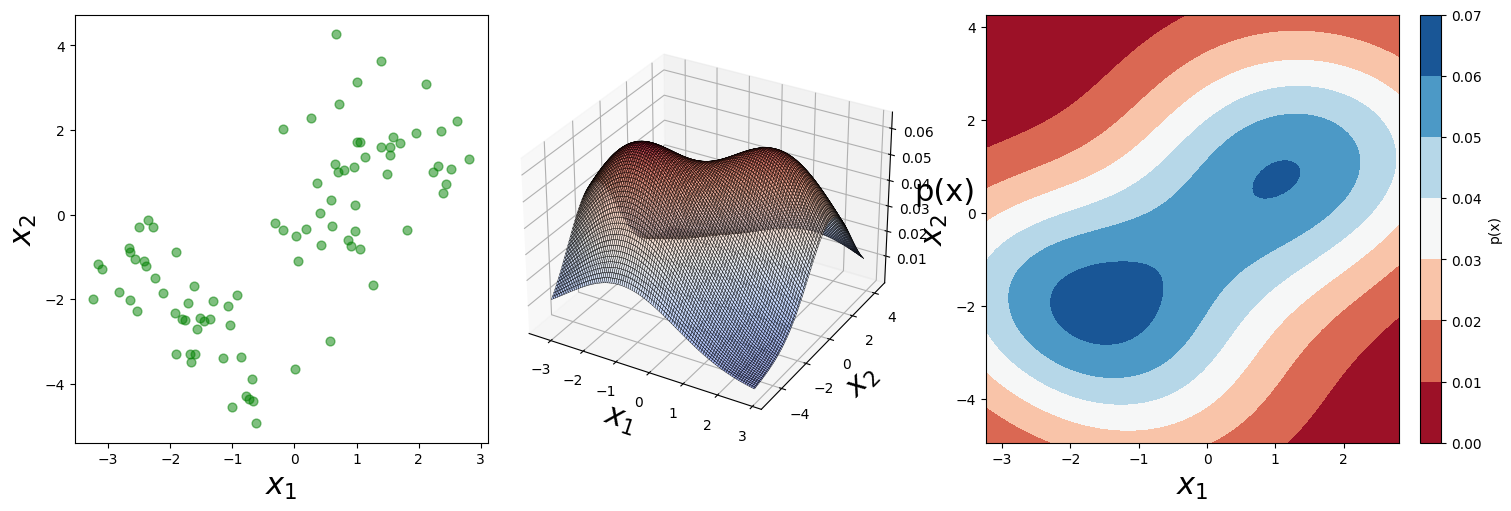

In [17]:
FS = (15,5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# Subplot 1 ------------------------
ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(x[:,0],x[:,1], marker='o', color='green', s=40, alpha=0.5) # type: ignore
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)

# Subplot 2 ------------------------
ax2 = fig.add_subplot(spec[0, 1],projection='3d')
ax2.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.25, antialiased=True, cmap=cm.coolwarm, edgecolors='k', alpha=0.5) # type: ignore
ax2.set_xlabel('$x_1$', fontsize=22)
ax2.set_ylabel('$x_2$', fontsize=22)
ax2.set_zlabel('p(x)', fontsize=22)

# Subplot 3 ------------------------
ax3 = fig.add_subplot(spec[0, 2])
g1 = ax3.contourf(X1, X2, Z, cmap=cm.RdBu) # type: ignore
ax3.set_xlabel('$x_1$', fontsize=22)
ax3.set_ylabel('$x_2$', fontsize=22)
fig.colorbar(g1, orientation="vertical", label= 'p(x)')

plt.show()

### Cálculo da distância euclidiana

In [18]:
def euclid_dist(A, B):
    d =  (A - B)
    return np.linalg.norm(d)

### Função para cálculo da verossimilhança da observação

In [19]:
def multivariate_gaussian(x, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    fator = 1 / np.sqrt((2*np.pi)**n * Sigma_det)
    expo =  ( ((x-mu).T).dot( Sigma_inv ) ).dot(x-mu)
    return np.exp(-0.5*expo) / fator

### Cálculo da probabilidade estimada pelo método KNN

In [20]:
def prob_knn(x,k,dataSet,V0):
    m = np.shape(dataSet)[0]
    n = np.shape(dataSet)[1]
    dist = np.zeros(m)
    for i in range(0,m):
        v = (dataSet[i,:] - x)
        dist[i] = np.sqrt( v.dot(v.T) )
        
    dist.sort()
    Vk = V0 * (dist[k-1] ** n)
    
    return k/(m * Vk)

### Cálculo de uma unidade de hiper-volume

In [21]:
def unit_space_volume(n):
    n = int(n)
    if n%2 == 0:
        return (np.pi ** (n//2))/np.math.factorial(int(n/2)) # type: ignore
    else:
        return (2**n) * (np.pi ** ((n-1)/2)) * np.math.factorial(int((n-1)/2)) * np.math.factorial(int(n)) # type: ignore

### Leitura dos conjuntos de dados $\mathcal{D}$ e $\mathcal{I}$
* Os conjuntos $\mathcal{D}$ e $\mathcal{I}$ foram gerados por um procedimento anterior!

In [22]:
pathD = 'Data/saidaSim_D.txt'
pathI = 'Data/saidaSim_I.txt'

yD,xD = read_class_data(pathD)
yI,xI = read_class_data(pathI)
cla1 = np.where(yD == 1)[0]
cla2 = np.where(yD == 2)[0]
predML = np.copy(yI)
predMDE = np.copy(yI)
predKNN = np.copy(yI)
m = yI.shape[0]

### Estimação/definição de parâmetros exigidos pelos métodos ML, MDE,e KNN 

In [23]:
dim = xD.shape[1]
mu1 = np.zeros(dim)
mu2 = np.zeros(dim)
for i in range(0,dim):
    mu1[i] = np.mean( xD[cla1,i] )
    mu2[i] = np.mean( xD[cla2,i] )
    
sigma1 = np.cov( (xD[cla1,:]).T )
sigma2 = np.cov( (xD[cla2,:]).T )
k = 5 
V0 = unit_space_volume(dim)

### O processo de classificação

In [24]:
for i in range(0,m):
    padrao = xI[i,:]
    #Classificação ML
    if ( multivariate_gaussian(padrao, mu1, sigma1) >= multivariate_gaussian(padrao, mu2, sigma2) ):
        predML[i] = 1
    else: predML[i] = 2
    #Classificação MDE
    if euclid_dist(padrao, mu1) <= euclid_dist(padrao, mu2):
        predMDE[i] = 1
    else:
        predMDE[i] = 2
    #Classificação KNN
    if prob_knn(padrao,k,xD[cla1,:],V0) >= prob_knn(padrao,k,xD[cla2,:],V0):
        predKNN[i] = 1
    else:
        predKNN[i] = 2

### Verificação da acurácia de cada um dos métodos

In [25]:
acertoML  = np.count_nonzero( yI == predML ) / m
acertoMDE = np.count_nonzero( yI == predMDE ) / m
acertoKNN = np.count_nonzero( yI == predKNN ) / m

print("Acertos ML: %f \nAcertos MDE: %f \nAcertos KNN: %f"%(acertoML,acertoMDE,acertoKNN))

Acertos ML: 0.824000 
Acertos MDE: 0.935000 
Acertos KNN: 0.917000


## Adicional - apenas para visulaizar as regiões de decisão e a noção de acerto/erro
É importante observar algumas características no código abaixo:
* São definidas variáveis para armazenar a classificação sobre padrões no espaço de atributos $\mathbb{R}^2$
* Selecionamos este espaço em função da possiblidade de visualizar os resultados

In [26]:
#Definição espaço de atributos -- intervalo de valores em cada eixo (xmin~xmax) X (ymin ~ymax)
xmin = np.min(np.array([np.min(xD[:,0]), np.min(xI[:,0])]))
xmax = np.max(np.array([np.max(xD[:,0]), np.max(xI[:,0])]))
ymin = np.min(np.array([np.min(xD[:,1]), np.min(xI[:,1])]))
ymax = np.max(np.array([np.max(xD[:,1]), np.max(xI[:,1])]))

#Definição de uma matriz para cada método, que deve armazenar o rótulo em cada posição do espaço de atributos
claML = np.ndarray((N, N))
claMDE = np.ndarray((N, N))
claKNN = np.ndarray((N, N))

#Útil o experimento e para os gráficos a seguir
X1 = np.linspace(xmin, xmax, N)
X2 = np.linspace(ymin, ymax, N)

for i in range(0,N):
    for j in range(0,N):
        padrao = [X1[i],X2[j]]

        #Classificação ML
        if ( multivariate_gaussian(padrao, mu1, sigma1) >= multivariate_gaussian(padrao, mu2, sigma2) ):
            claML[i,j] = 1
        else: claML[i,j] = 2

        #Classificação MDE
        if euclid_dist(padrao, mu1) <= euclid_dist(padrao, mu2):
            claMDE[i,j] = 1
        else:
            claMDE[i,j] = 2

        #Classificação KNN
        if prob_knn(padrao,k,xD[cla1,:],V0) >= prob_knn(padrao,k,xD[cla2,:],V0):
            claKNN[i,j] = 1
        else:
            claKNN[i,j] = 2

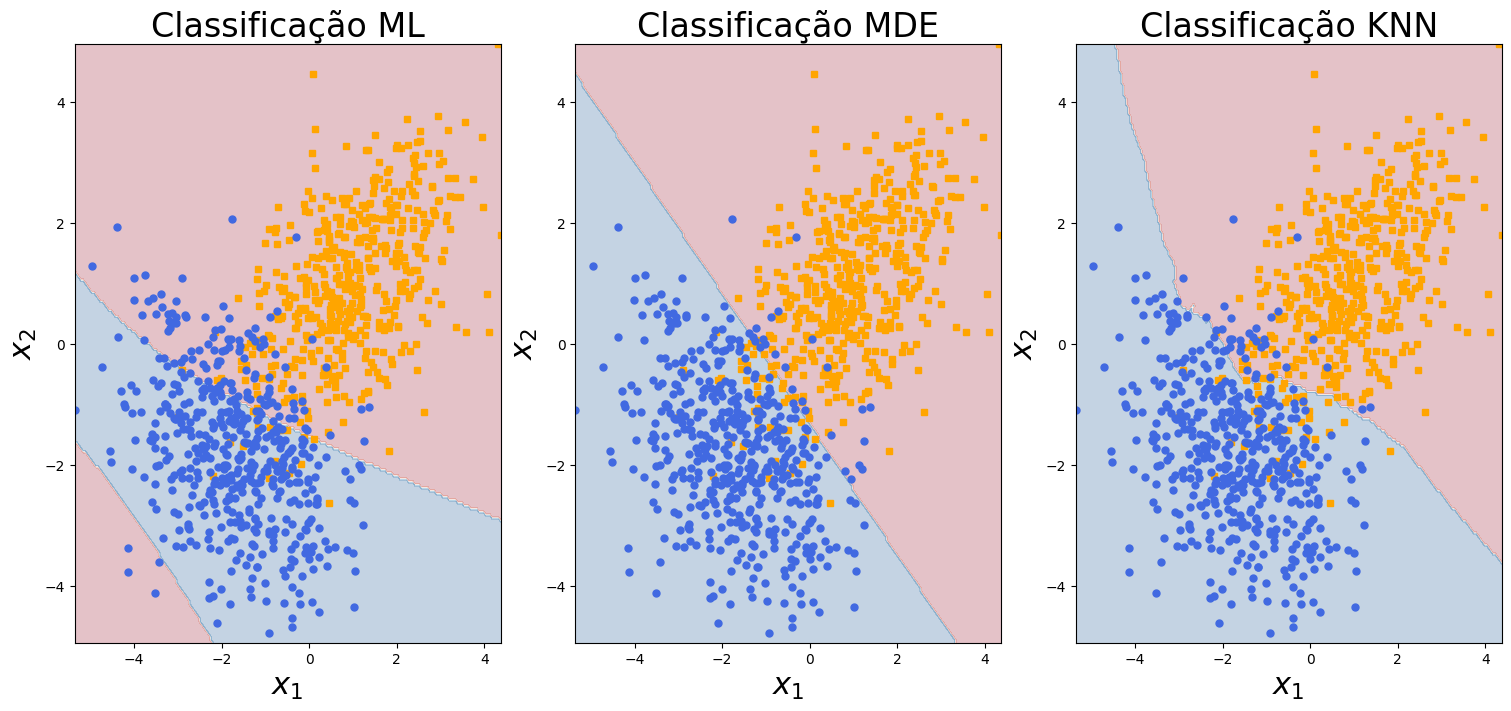

In [27]:
FS = (15,7)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# Subplot 1 ------------------------
ax1 = fig.add_subplot(spec[0, 0])
ax1.contourf(X1, X2, claML, cmap=cm.RdBu,alpha=0.25) # type: ignore
ax1.plot(xI[ np.where(yI == 1) ,0], xI[np.where(yI == 1) ,1], 's', color='orange', markersize=5)
ax1.plot(xI[ np.where(yI == 2) ,0], xI[np.where(yI == 2) ,1], 'o', color='royalblue', markersize=5)
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)
ax1.set_title('Classificação ML', fontsize=24)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

# Subplot 2 ------------------------
ax1 = fig.add_subplot(spec[0, 1])
ax1.contourf(X1, X2, claMDE, cmap=cm.RdBu,alpha=0.25) # type: ignore
ax1.plot(xI[ np.where(yI == 1) ,0], xI[np.where(yI == 1) ,1], 's', color='orange', markersize=5)
ax1.plot(xI[ np.where(yI == 2) ,0], xI[np.where(yI == 2) ,1], 'o', color='royalblue', markersize=5)
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)
ax1.set_title('Classificação MDE', fontsize=24)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

# Subplot 3 ------------------------
ax1 = fig.add_subplot(spec[0, 2])
ax1.contourf(X1, X2, claKNN, cmap=cm.RdBu,alpha=0.25) # type: ignore
ax1.plot(xI[ np.where(yI == 1) ,0], xI[np.where(yI == 1) ,1], 's', color='orange', markersize=5)
ax1.plot(xI[ np.where(yI == 2) ,0], xI[np.where(yI == 2) ,1], 'o', color='royalblue', markersize=5)
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)
ax1.set_title('Classificação KNN', fontsize=24)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

plt.show()